# Grid search SARIMAX and ARIMA models

SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is a generalization of the ARIMA model that allows incorporating seasonality and exogenous variables. This model has a total of 6 hyperparameters that must be specified when training the model:

+ p: Trend autoregression order.

+ d: Trend difference order.

+ q: Trend moving average order.

+ P: Seasonal autoregressive order.

+ D: Seasonal difference order.

+ Q: Seasonal moving average order.

+ m: The number of time steps for a single seasonal period.

One way to find the best values is by using grid search. The `grid_search_sarimax` function of the *skforecast.model_selection_statsmodels* module is a wrapper that automates this process using the [SARIMAX](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX)   implementation available in the statsmodels library.

## Libraries

In [2]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.model_selection_statsmodels import grid_search_sarimax

## Data

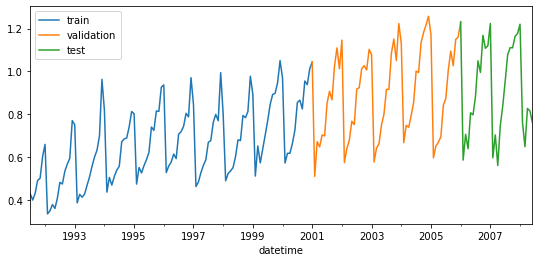

In [3]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 24
data_train = data.loc[: '2001-01-01']
data_val = data.loc['2001-01-01' : '2006-01-01']
data_test  = data.loc['2006-01-01':]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_val.plot(ax=ax, label='validation')
data_test.plot(ax=ax, label='test')
ax.legend();

## Grid Search

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
param_grid = {'order': [(12, 0, 0), (12, 2, 0), (12, 1, 0), (12, 1, 1), (14, 1, 4)],
             'seasonal_order': [(0, 0, 0, 0)],
             'trend': [None, 'n', 'c']}

results_grid = grid_search_sarimax(
                y = data.loc[:'2006-01-01'],
                param_grid = param_grid,
                initial_train_size = len(data_train),
                fixed_train_size = False,
                steps = 7,
                metric = 'mean_absolute_error',
                refit = False,
                verbose = False,
                fit_kwargs = {'maxiter': 200, 'disp': 0}
               )

results_grid

root       INFO  Number of models compared: 15
100%|█████████████████████████████████████████████████████| 15/15 [00:27<00:00,  1.86s/it]


params    metric       order  \
9   {'order': (12, 1, 1), 'seasonal_order': (0, 0,...  0.050468  (12, 1, 1)   
10  {'order': (12, 1, 1), 'seasonal_order': (0, 0,...  0.050468  (12, 1, 1)   
12  {'order': (14, 1, 4), 'seasonal_order': (0, 0,...  0.051068  (14, 1, 4)   
13  {'order': (14, 1, 4), 'seasonal_order': (0, 0,...  0.051068  (14, 1, 4)   
14  {'order': (14, 1, 4), 'seasonal_order': (0, 0,...  0.051486  (14, 1, 4)   
11  {'order': (12, 1, 1), 'seasonal_order': (0, 0,...  0.051967  (12, 1, 1)   
6   {'order': (12, 1, 0), 'seasonal_order': (0, 0,...  0.052849  (12, 1, 0)   
7   {'order': (12, 1, 0), 'seasonal_order': (0, 0,...  0.052849  (12, 1, 0)   
8   {'order': (12, 1, 0), 'seasonal_order': (0, 0,...  0.053495  (12, 1, 0)   
3   {'order': (12, 2, 0), 'seasonal_order': (0, 0,...  0.054444  (12, 2, 0)   
4   {'order': (12, 2, 0), 'seasonal_order': (0, 0,...  0.054444  (12, 2, 0)   
5   {'order': (12, 2, 0), 'seasonal_order': (0, 0,...  0.054479  (12, 2, 0)   
0   {'order': (12, 0, 0), 'seasonal_order': (0, 0,...  0.063648  (12, 0, 0)   
1   {'order': (12, 0, 0), 'seasonal_order': (0, 0,...  0.063648  (12, 0, 0)   
2   {'order': (12, 0, 0), 'seasonal_order': (0, 0,...  0.063976  (12, 0, 0)   

   seasonal_order trend  
9    (0, 0, 0, 0)  None  
10   (0, 0, 0, 0)     n  
12   (0, 0, 0, 0)  None  
13   (0, 0, 0, 0)     n  
14   (0, 0, 0, 0)     c  
11   (0, 0, 0, 0)     c  
6    (0, 0, 0, 0)  None  
7    (0, 0, 0, 0)     n  
8    (0, 0, 0, 0)     c  
3    (0, 0, 0, 0)  None  
4    (0, 0, 0, 0)     n  
5    (0, 0, 0, 0)     c  
0    (0, 0, 0, 0)  None  
1    (0, 0, 0, 0)     n  
2    (0, 0, 0, 0)     c

In [6]:
%%html
<style>
.jupyter-wrapper .jp-CodeCell .jp-Cell-inputWrapper .jp-InputPrompt {display: none;}
</style>